In [1]:
import pandas as pd

In [326]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
# Calculate seconds from the beginning of the data collection
def change_time(data):
    data['Datetime'] = pd.to_datetime(data['Month'] + ' ' + data[' Day'].astype(str) + ' ' + data[' Time'], format='%b %d %H:%M:%S')
    data['Seconds'] = (data['Datetime'] - data['Datetime'].iloc[0]).dt.total_seconds()


def plot_metric(data, metric, ylabel, title, xlim=None):
    plt.figure(figsize=(10, 4))
    plt.plot(data['Seconds'], data[metric], label=ylabel, color='tab:blue')
    plt.title(title)
    plt.xlabel('Seconds Since Start')
    plt.ylabel(ylabel)
    plt.ylim(min(data[metric]) - 10, max(data[metric]) + 10)
    if xlim:
        plt.xlim(xlim)
        filtered_data = data[(data['Seconds'] >= xlim[0]) & (data['Seconds'] <= xlim[1])]
        plt.ylim(min(filtered_data[metric]) - 10, max(filtered_data[metric]) + 10)
    plt.grid(True)
    # plt.savefig('result10.png')
    plt.show()

In [ ]:
# local data from now on
client_baseline_phc = pd.read_csv('./client/phc2sys_20240510_1719.csv')
gm_baseline_phc = pd.read_csv('./grandmaster/phc2sys_20240510_1719.csv')
client_baseline_ptp = pd.read_csv('./client/ptp4l_20240510_1719.csv')
change_time(client_baseline_phc)
change_time(client_baseline_ptp)
change_time(gm_baseline_phc)

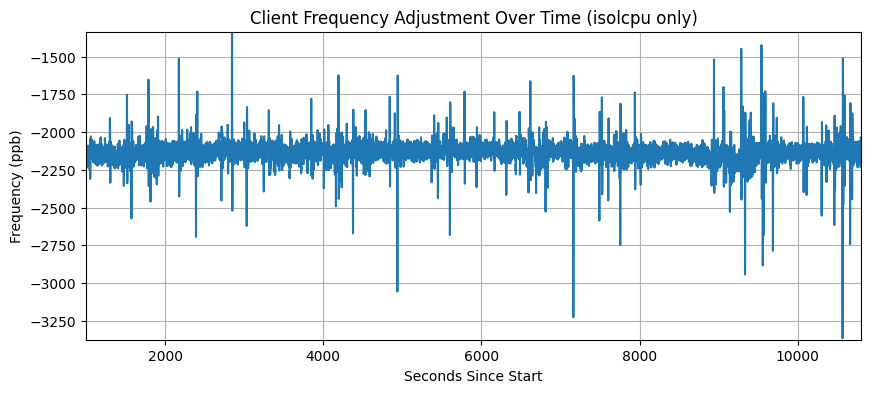

In [322]:
plot_metric(client_isol_phc, ' Freq', 'Frequency (ppb)', 'Client Frequency Adjustment Over Time (isolcpu only)',time_range)

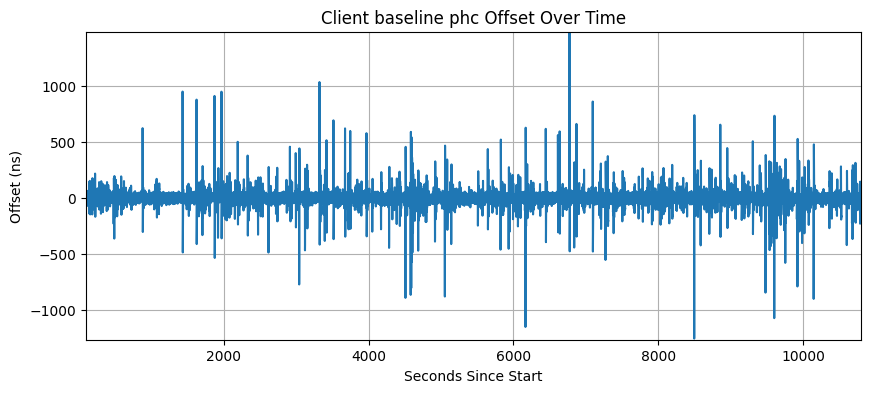

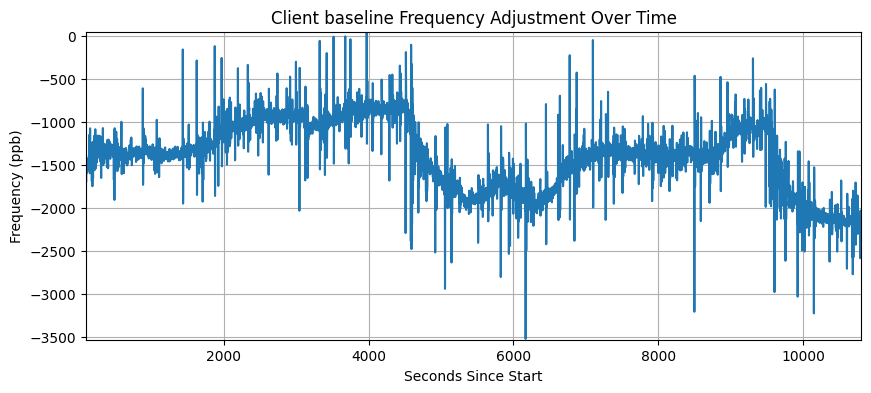

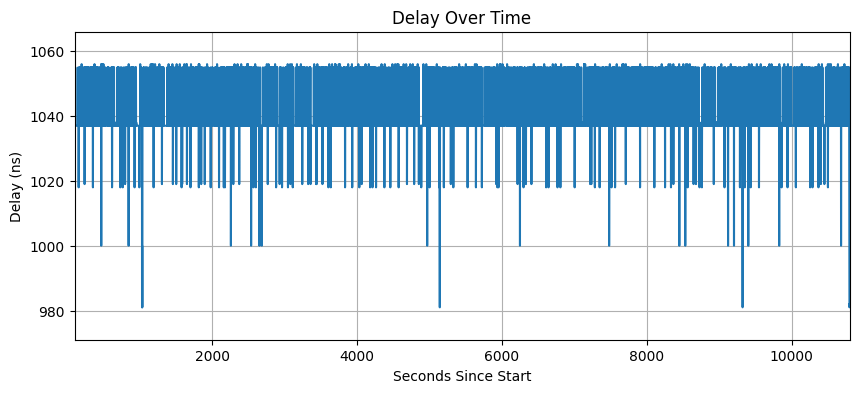

In [138]:
# client baseline 
time_range = (100, 10800)
plot_metric(gm_baseline_phc, ' Offset', 'Offset (ns)', 'Client Baseline phc Offset Over Time', time_range)
# plot_metric(client_baseline_phc, ' Offset', 'Offset (ns)', 'Client baseline phc Offset Over Time', (100,200))
# plot_metric(gm_baseline_phc, ' Offset', 'Offset (ns)', 'Client baseline phc Offset Over Time', (100,1100))
# plot_metric(client_baseline_phc, ' Freq', 'Frequency (ppb)', 'Client Baseline Frequency Adjustment Over Time',time_range)

plot_metric(client_baseline_phc, ' Delay', 'Delay (ns)', 'Delay Over Time',time_range)


In [ ]:
time_range = (1000, 10800)
change_time(gm_baseline_phc)
plot_metric(gm_baseline_phc, ' Offset', 'Offset (ns)', 'Time Synchronization Offset Over Time', time_range)
plot_metric(gm_baseline_phc, ' Freq', 'Frequency (ppb)', 'Frequency Adjustment Over Time',time_range)
plot_metric(gm_baseline_phc, ' Delay', 'Delay (ns)', 'Delay Over Time',time_range)


In [ ]:
time_range = (1000, 10800)
change_time(client_baseline_ptp)
plot_metric(client_baseline_ptp, ' Offset', 'Offset (ns)', 'Time Synchronization Offset Over Time', time_range)
plot_metric(client_baseline_ptp, ' Freq', 'Frequency (ppb)', 'Frequency Adjustment Over Time',time_range)
plot_metric(client_baseline_ptp, ' Path_Delay', 'Path_Delay (ns)', 'Path Delay Over Time',time_range)


In [180]:
def plot_histogram(data, metric, title, num_bins=20, xlim=None):
    if xlim:
        filtered_data = data[(data['Seconds'] >= xlim[0]) & (data['Seconds'] <= xlim[1])]
    else:
        filtered_data = data
    bin_edges = np.linspace(filtered_data[metric].min()/10, filtered_data[metric].max()/10, num_bins + 1)
    plt.figure(figsize=(10, 4))
    plt.hist(filtered_data[metric], bins=bin_edges, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

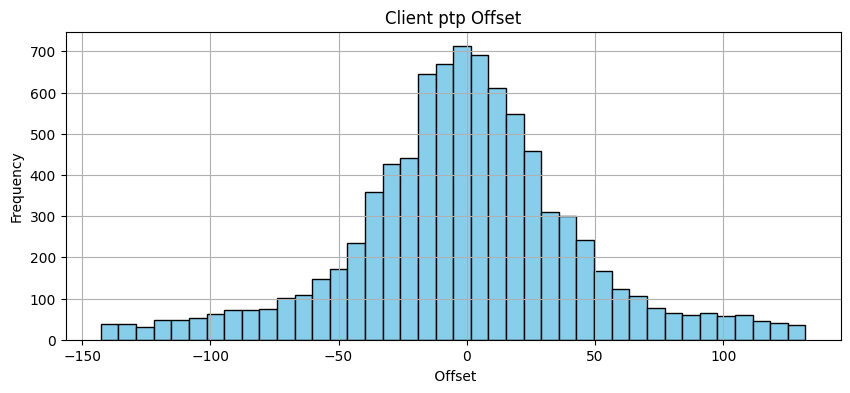

In [97]:
time_range = (1000, 10800)
plot_histogram(client_baseline_ptp, ' Offset', 'Client ptp Offset',40, time_range)

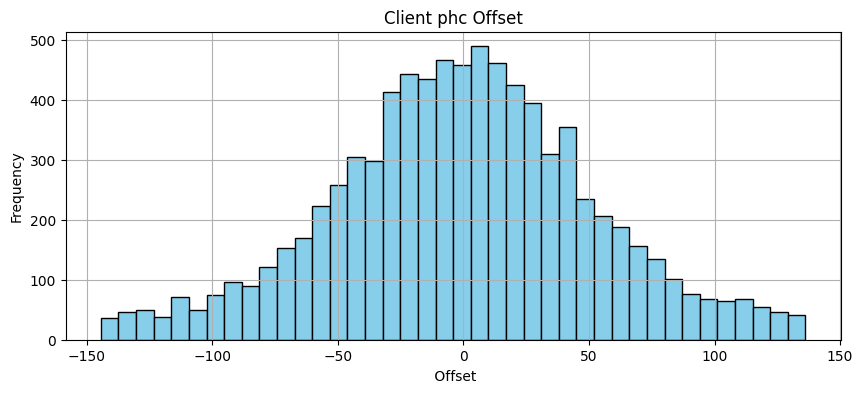

In [98]:
plot_histogram(client_baseline_phc, ' Offset', 'Client phc Offset',40, time_range)

In [5]:
# Start CPU Affinity
client_cpuAffinity_phc = pd.read_csv('./client/phc2sys_20240511_0228.csv')
gm_cpuAffinity_phc = pd.read_csv('./grandmaster/phc2sys_20240511_0228.csv')
client_cpuAffinity_ptp = pd.read_csv('./client/ptp4l_20240511_0228.csv')
change_time(client_cpuAffinity_phc)
change_time(gm_cpuAffinity_phc)
change_time(client_cpuAffinity_ptp)

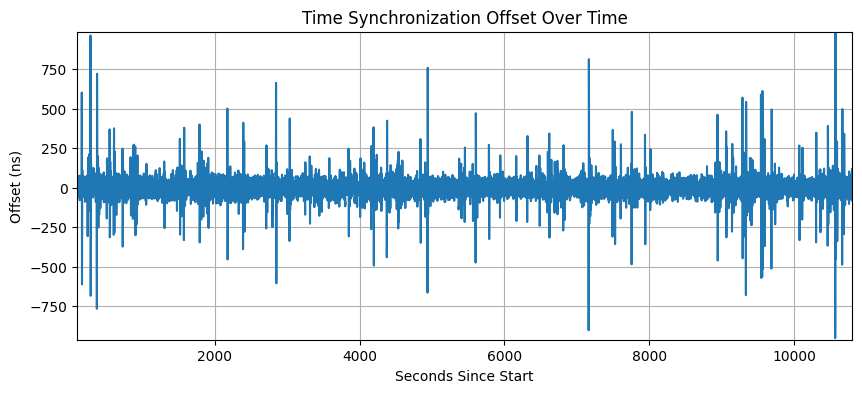

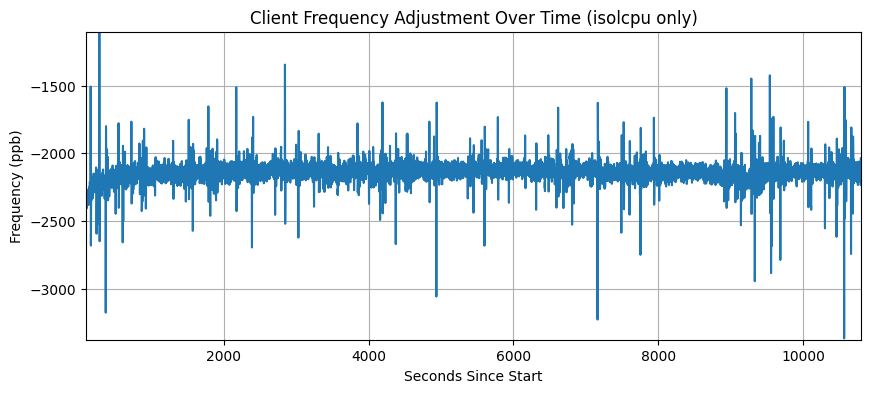

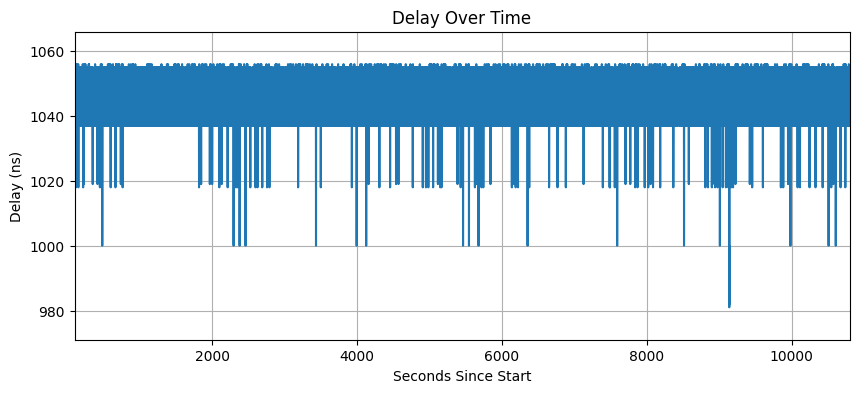

In [140]:
plot_metric(client_isol_phc, ' Offset', 'Offset (ns)', 'Time Synchronization Offset Over Time', time_range)
plot_metric(client_isol_phc, ' Freq', 'Frequency (ppb)', 'Client Frequency Adjustment Over Time (isolcpu only)',time_range)
plot_metric(client_isol_phc, ' Delay', 'Delay (ns)', 'Delay Over Time',time_range)

In [ ]:
plot_metric(gm_cpuAffinity_phc, ' Offset', 'Offset (ns)', 'Time Synchronization Offset Over Time', time_range)
plot_metric(gm_cpuAffinity_phc, ' Freq', 'Frequency (ppb)', 'Frequency Adjustment Over Time',time_range)
plot_metric(gm_cpuAffinity_phc, ' Delay', 'Delay (ns)', 'Delay Over Time',time_range)

In [ ]:
plot_metric(client_cpuAffinity_ptp, ' Offset', 'Offset (ns)', 'Time Synchronization Offset Over Time', time_range)
plot_metric(client_cpuAffinity_ptp, ' Freq', 'Frequency (ppb)', 'Frequency Adjustment Over Time',time_range)
plot_metric(client_cpuAffinity_ptp, ' Path_Delay', 'Path Delay (ns)', 'Delay Over Time',time_range)

In [148]:
# statistical tests
def significance(data_pre,data_post):
    min_length = min(len(data_pre), len(data_post))
    data_pre = data_pre.head(min_length)
    data_post = data_post.head(min_length)
    differences = data_post[' Offset'][100:].abs() - data_pre[' Offset'][100:].abs()
    
    stat, p = wilcoxon(differences)
    print('Wilcoxon Signed-Rank Test: Stat=%.8f, p=%.8f' % (stat, p))
    if p < 0.05:
        print("Wilcoxon Test: There is a statistically significant difference in the medians of Offset due to optimization.")
    else:
        print("Wilcoxon Test: There is no statistically significant difference in the medians of Offset due to optimization.")
    print(data_pre[' Offset'][100:].abs().mean())
    print(data_post[' Offset'][100:].abs().mean())
    
    stat2, p2 = mannwhitneyu(data_pre[' Offset'][100:].abs(), data_post[' Offset'][100:].abs(),alternative='two-sided')
    print('Mann-Whitney U Test: Statistics=%.8f, p=%.8f' % (stat, p))
    
    if p2 < 0.05:
        print("Mann-Whitney Test: There is a statistically significant difference between the groups.")
    else:
        print("Mann-Whitney Test: There is no statistically significant difference between the groups.")
    median_diff = differences.median()
    mean_diff = differences.mean()
    print(f'Median of differences: {median_diff}')
    print(f'Mean of differences: {mean_diff}')
    if median_diff > 0:
        print("The median post-optimization offset is larger.")
    elif median_diff < 0:
        print("The median post-optimization offset is smaller.")
    if mean_diff > 0:
        print("On average, the post-optimization offset is larger.")
    elif mean_diff < 0:
        print("On average, the post-optimization offset is smaller.")
    else:
        print("No average difference in offset size.")

In [303]:
# paired t-test
t_stat, p_value = ttest_rel(offset_pre, offset_post)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference due to optimization.")
else:
    print("There is no statistically significant difference due to optimization.")


T-statistic: -5.599381814265759
P-value: 2.2043227425988368e-08
There is a statistically significant difference due to optimization.


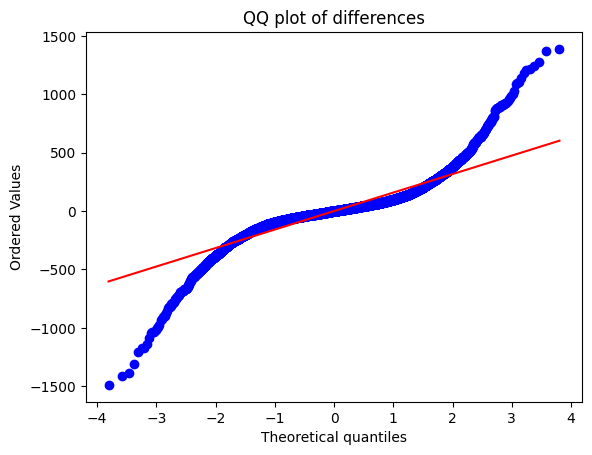

Shapiro-Wilk Test: Statistics=0.839, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/0t/_7346qmx4mvg6g3j93vhtqcw0000gn/T/ipykernel_28984/788307887.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9784.
  stat, p = stats.shapiro(differences)


In [193]:
data_pre = client_baseline_phc
data_post = client_isol_phc
differences = data_pre[' Offset'][1000:] - data_post[' Offset'][1000:]
# differences = data_pre[' Delay'][1000:] - data_post[' Delay'][1000:]
# Plotting QQ plot
stats.probplot(differences, dist="norm", plot=plt)
plt.title('QQ plot of differences')
plt.show()

# Shapiro-Wilk test
stat, p = stats.shapiro(differences)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [168]:
import statsmodels.api as sm
# trying to do regression
data_pre['Optimization'] = 0  # Before optimization
data_post['Optimization'] = 1  # After optimization
combined_data = pd.concat([data_pre, data_post])
X = combined_data['Optimization']  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = combined_data[' Offset'].abs()  # Response

# Build the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Offset   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8636
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.353
Time:                        22:05:42   Log-Likelihood:            -2.5115e+05
No. Observations:               21570   AIC:                         5.023e+05
Df Residuals:                   21568   BIC:                         5.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          985.6836    265.530      3.712   

/var/folders/0t/_7346qmx4mvg6g3j93vhtqcw0000gn/T/ipykernel_20658/3464809873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Optimization'] = 0  # Before optimization
/var/folders/0t/_7346qmx4mvg6g3j93vhtqcw0000gn/T/ipykernel_20658/3464809873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_post['Optimization'] = 1  # After optimization


In [6]:
# Start CPU Affinity+Steering
client_cpuAffinity_Steering_phc = pd.read_csv('./client/phc2sys_20240511_1120.csv')
gm_cpuAffinity_Steering_phc = pd.read_csv('./grandmaster/phc2sys_20240511_1120.csv')
client_cpuAffinity_Steering_ptp = pd.read_csv('./client/ptp4l_20240511_1120.csv')
change_time(client_cpuAffinity_Steering_phc)
change_time(gm_cpuAffinity_Steering_phc)
change_time(client_cpuAffinity_Steering_ptp)

In [7]:
# cpuAffinity + Steering + thermal
client_cpuAffinity_Steering_Thermal_phc = pd.read_csv('./client/phc2sys_20240511_1945.csv')
gm_cpuAffinity_Steering_Thermal_phc = pd.read_csv('./grandmaster/phc2sys_20240511_1945.csv')
client_cpuAffinity_Steering_Thermal_ptp = pd.read_csv('./client/ptp4l_20240511_1945.csv')
change_time(client_cpuAffinity_Steering_Thermal_phc)
change_time(gm_cpuAffinity_Steering_Thermal_phc)
change_time(client_cpuAffinity_Steering_Thermal_ptp)

In [8]:
# only isol
client_isol_phc = pd.read_csv('./client/phc2sys_20240510_2128.csv')
gm_isol_phc = pd.read_csv('./grandmaster/phc2sys_20240510_2128.csv')
client_isol_ptp = pd.read_csv('./client/ptp4l_20240510_2128.csv')
change_time(client_isol_phc)
change_time(gm_isol_phc)
change_time(client_isol_ptp)

In [47]:
# steering2cores
client_Steering2cores_phc = pd.read_csv('./client/phc2sys_20240511_2356.csv')
gm_Steering2cores_phc = pd.read_csv('./grandmaster/phc2sys_20240511_2356.csv')
client_Steering2cores_ptp = pd.read_csv('./client/ptp4l_20240511_2356.csv')
change_time(client_Steering2cores_phc)
change_time(gm_Steering2cores_phc)
change_time(client_Steering2cores_ptp)

In [150]:
client_round2isol_phc = pd.read_csv('./client/phc2sys_20240512_0831.csv')
gm_round2isol_phc = pd.read_csv('./grandmaster/phc2sys_20240512_0831.csv')
client_round2isol_ptp = pd.read_csv('./client/ptp4l_20240512_0831.csv')
change_time(client_round2isol_phc)
change_time(gm_round2isol_phc)
change_time(client_round2isol_ptp)

In [155]:
# 0512_1417
client_0512_1417_phc = pd.read_csv('./client/phc2sys_20240512_1417.csv')
gm_0512_1417_phc = pd.read_csv('./grandmaster/phc2sys_20240512_1417.csv')
client_0512_1417_ptp = pd.read_csv('./client/ptp4l_20240512_1417.csv')
change_time(client_0512_1417_phc)
change_time(gm_0512_1417_phc)
change_time(client_0512_1417_ptp)

In [199]:
# 0512_1948
client_0512_1948_phc = pd.read_csv('./client/phc2sys_20240512_1948.csv')
gm_0512_1948_phc = pd.read_csv('./grandmaster/phc2sys_20240512_1948.csv')
client_0512_1948_ptp = pd.read_csv('./client/ptp4l_20240512_1948.csv')
change_time(client_0512_1948_phc)
change_time(gm_0512_1948_phc)
change_time(client_0512_1948_ptp)

In [203]:
# 0512_2344
client_0512_2344_phc = pd.read_csv('./client/phc2sys_20240512_2344.csv')
gm_0512_2344_phc = pd.read_csv('./grandmaster/phc2sys_20240512_2344.csv')
client_0512_2344_ptp = pd.read_csv('./client/ptp4l_20240512_2344.csv')
change_time(client_0512_2344_phc)
change_time(gm_0512_2344_phc)
change_time(client_0512_2344_ptp)

In [217]:
# 0513_0825
client_0513_0825_phc = pd.read_csv('./client/phc2sys_20240513_0825.csv')
gm_0513_0825_phc = pd.read_csv('./grandmaster/phc2sys_20240513_0825.csv')
client_0513_0825_ptp = pd.read_csv('./client/ptp4l_20240513_0825.csv')
change_time(client_0513_0825_phc)
change_time(gm_0513_0825_phc)
change_time(client_0513_0825_ptp)

In [237]:
# 0513_1605
client_0513_1605_phc = pd.read_csv('./client/phc2sys_20240513_1605.csv')
gm_0513_1605_phc = pd.read_csv('./grandmaster/phc2sys_20240513_1605.csv')
client_0513_1605_ptp = pd.read_csv('./client/ptp4l_20240513_1605.csv')
change_time(client_0513_1605_phc)
change_time(gm_0513_1605_phc)
change_time(client_0513_1605_ptp)

In [329]:
significance(client_baseline_ptp,client_0513_1605_ptp)

Wilcoxon Signed-Rank Test: Stat=18776842.50000000, p=0.00000000
Wilcoxon Test: There is a statistically significant difference in the medians of Offset due to optimization.
62.09403948722747
28.786563114063817
Mann-Whitney U Test: Statistics=18776842.50000000, p=0.00000000
Mann-Whitney Test: There is a statistically significant difference between the groups.
Median of differences: -7.0
Mean of differences: -33.30747637316366
The median post-optimization offset is smaller.
On average, the post-optimization offset is smaller.


In [119]:
# Anova analysis
f_value, p_value = stats.f_oneway(client_baseline_phc[' Delay'][100:], client_isol_phc[ ' Delay'][100:], client_cpuAffinity_Steering_Thermal_phc[ ' Delay'][100:])
print(f"F-Value: {f_value}, P-Value: {p_value}")

F-Value: 245.79335878960333, P-Value: 1.1581014564537528e-106


In [ ]:
# 0512_1417 > cpu affinity ~= isol only ~= cpu affinity + Steering > Steering to 2 cores >> baseline > cpu Affinity + Steering + normal thermal control

In [214]:
client_baseline_sys = pd.read_csv('./client/system_metrics_20240511_0228.csv')
gm_baseline_sys = pd.read_csv('./grandmaster/system_metrics_20240511_0228.csv')
client_sys = pd.read_csv('./client/system_metrics_20240513_0825.csv')
gm_sys = pd.read_csv('./grandmaster/system_metrics_20240513_0825.csv')

In [45]:
def draw_sys(sys):
    sys.columns = sys.columns.str.strip()
    sys['Timestamp'] = pd.to_datetime(sys['Timestamp'])
    plt.figure(figsize=(12, 6))
    plt.plot(sys['Timestamp'], sys['Temp'], marker='o', linestyle='-')
    plt.title('Time Series Plot of Temperature')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(sys['Temp'].mean())

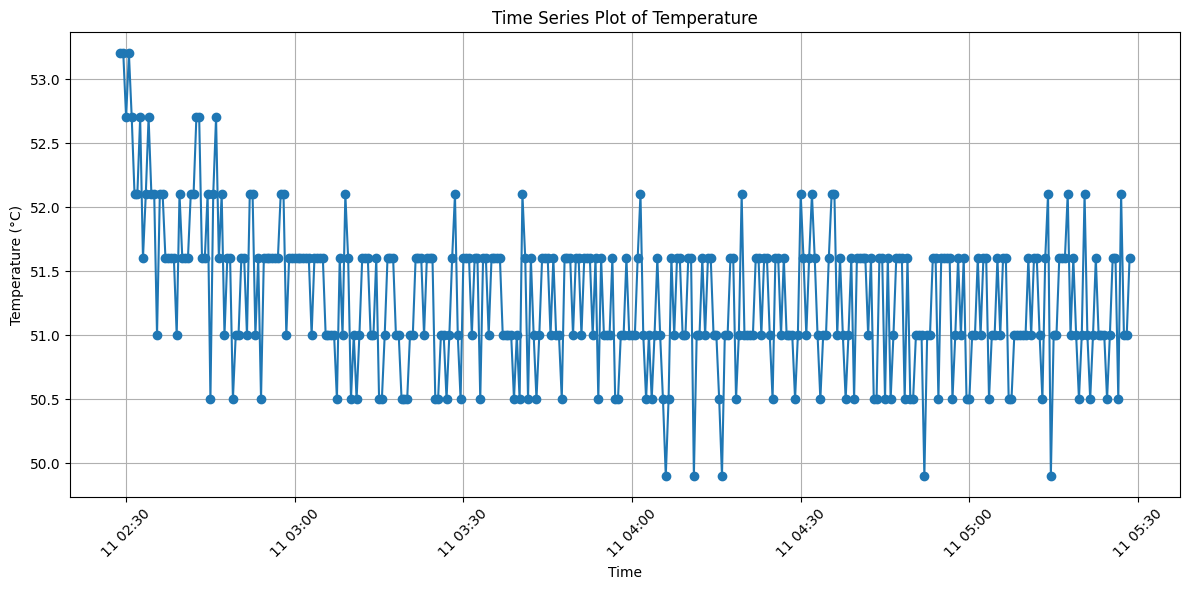

51.289444444444456


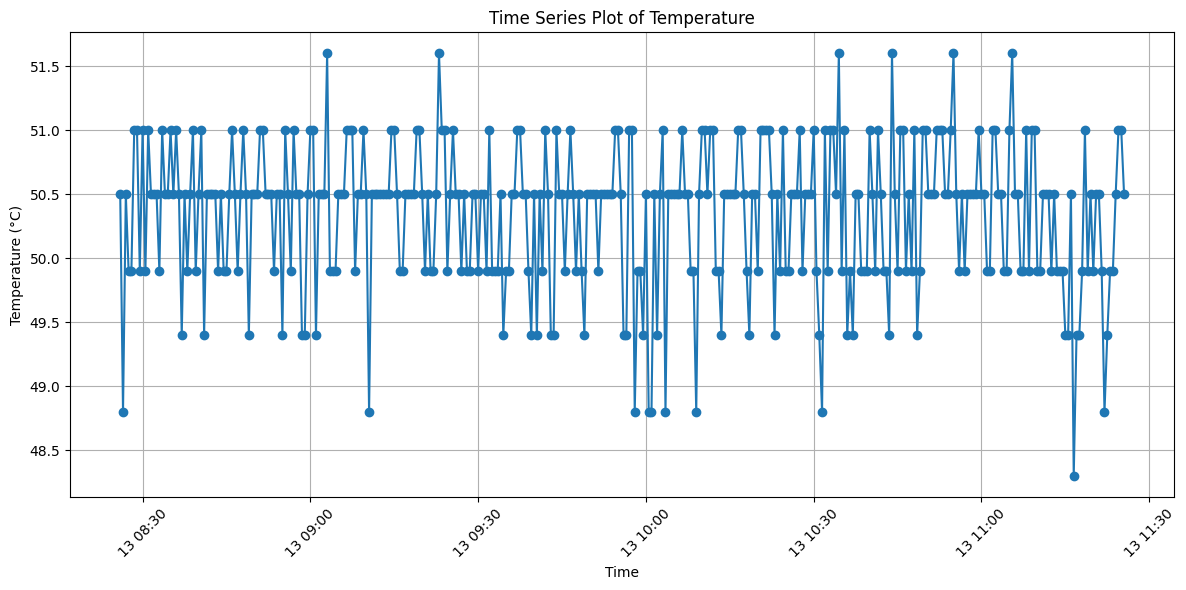

50.34305555555556


In [215]:
draw_sys(client_baseline_sys)
draw_sys(client_sys)

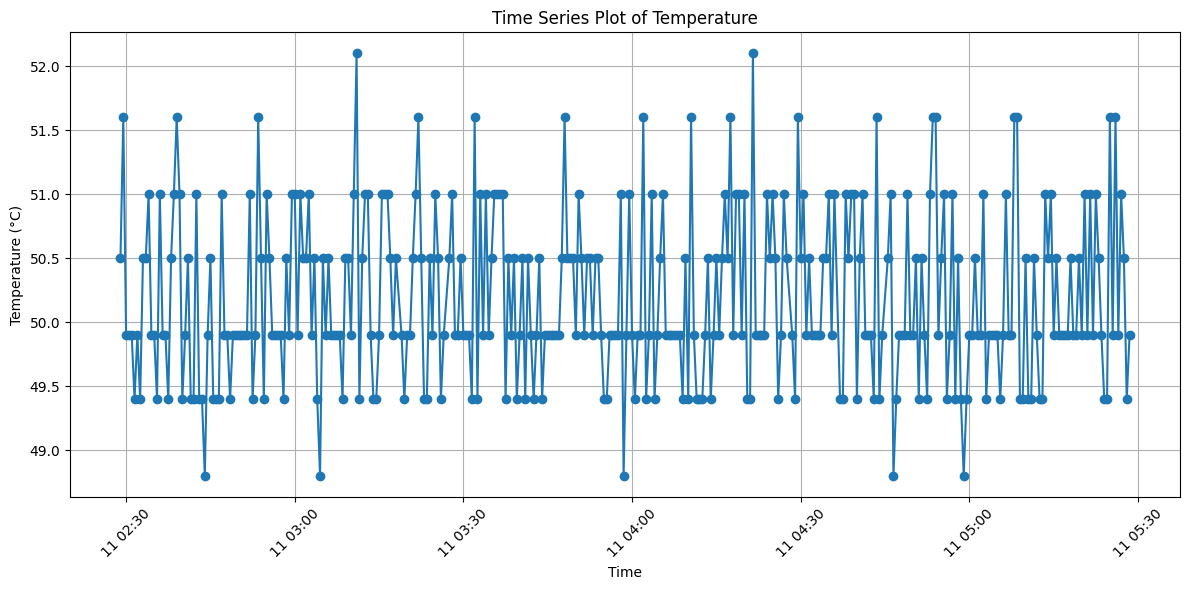

50.17915492957746


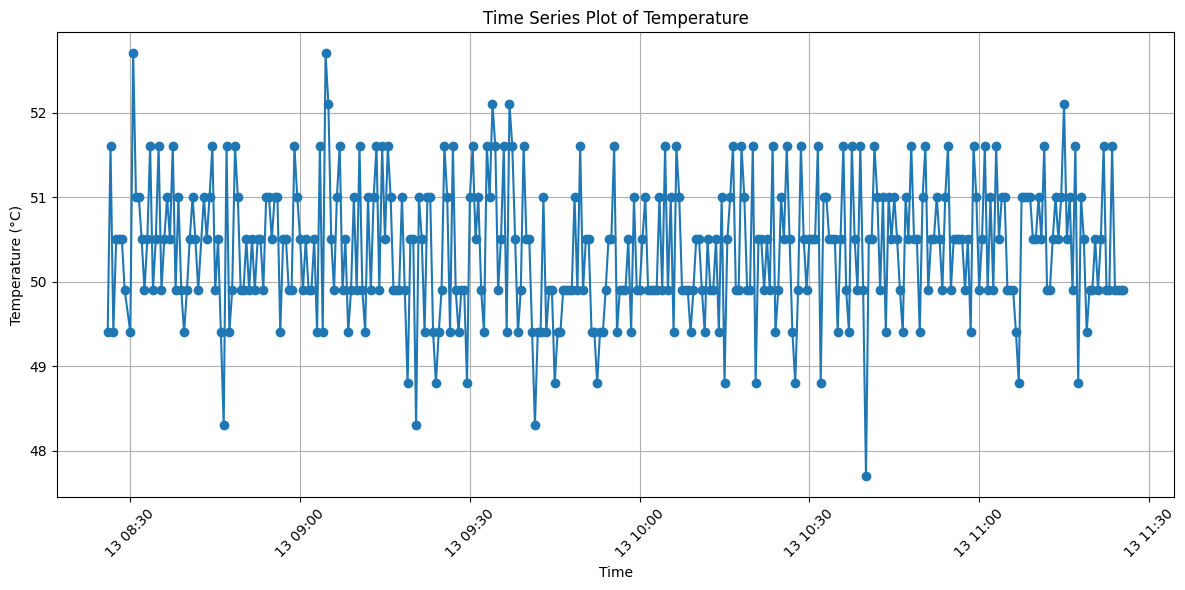

50.37234636871507


In [216]:
draw_sys(gm_baseline_sys)
draw_sys(gm_sys)

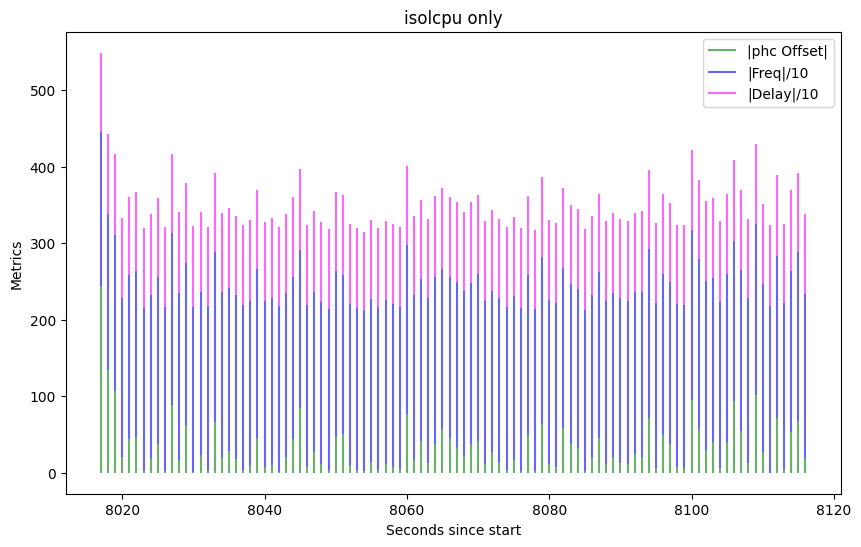

In [316]:
def plot_multiple_metrics(data, metrics,title='None'):
    plt.figure(figsize=(10, 6))
    offset = data[metrics[0]].abs()
    freq = data[metrics[1]].abs()/10
    delay = data[metrics[2]].abs()/10
    plt.vlines(data['Seconds'], 0, offset, colors='green', label='|phc Offset|', alpha=0.6)
    plt.vlines(data['Seconds'], offset, offset + freq, colors='blue', label='|Freq|/10', alpha=0.6)
    plt.vlines(data['Seconds'], offset + freq, offset + freq + delay, colors='magenta', label='|Delay|/10', alpha=0.6)
    plt.xlabel('Seconds since start')
    plt.ylabel('Metrics')
    plt.title(title)
    plt.legend()
    plt.savefig('result6.png')
    plt.show()



# plot_multiple_metrics(client_baseline_phc[8000:8100], [' Offset', ' Freq', ' Delay'],'Baseline')
plot_multiple_metrics(client_isol_phc[8000:8100], [' Offset', ' Freq', ' Delay'],'isolcpu only')

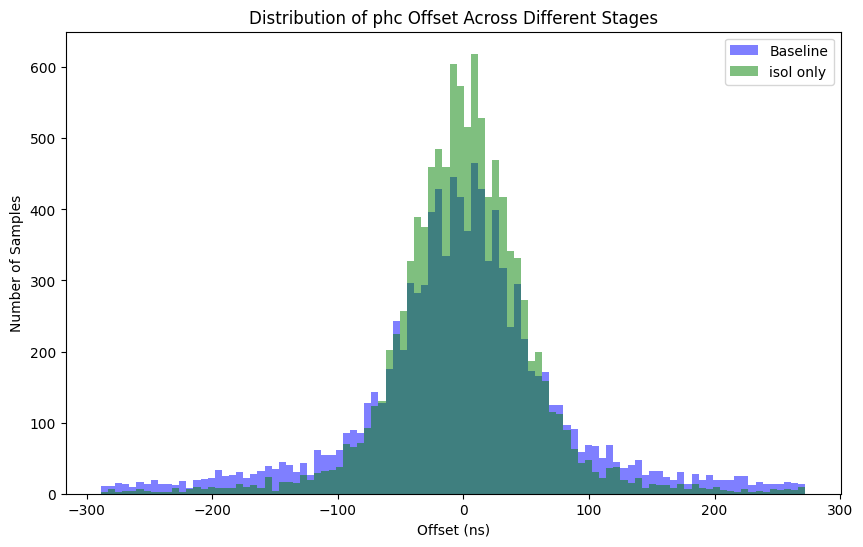

In [317]:
bins = np.linspace(client_baseline_phc[' Offset'][100:].min()/5, client_baseline_phc[' Offset'][100:].max()/5, 100) 

plt.figure(figsize=(10, 6))
plt.hist(client_baseline_phc[' Offset'], bins=bins, alpha=0.5, label='Baseline', color='blue')
plt.hist(client_isol_phc[' Offset'], bins=bins, alpha=0.5, label='isol only', color='green')
# plt.hist(client_cpuAffinity_phc[' Offset'], bins=bins, alpha=0.5, label='Applied Affinity ', color='red')
# plt.hist(client_cpuAffinity_Steering_Thermal_phc[' Offset'], bins=bins, alpha=0.5, label='Applied Affinity ', color='yellow')
plt.xlabel('Offset (ns)')
plt.ylabel('Number of Samples')
plt.title('Distribution of phc Offset Across Different Stages')
plt.legend(loc='upper right')
plt.savefig('result7.png')
plt.show()

In [283]:
# lab data from now on
client_0511_2335_phc = pd.read_csv('./lab/client/phc2sys_20240511_2335.csv')
client_0511_2335_ptp = pd.read_csv('./lab/client/ptp4l_20240511_2335.csv')
change_time(client_0511_2335_phc)
change_time(client_0511_2335_ptp)

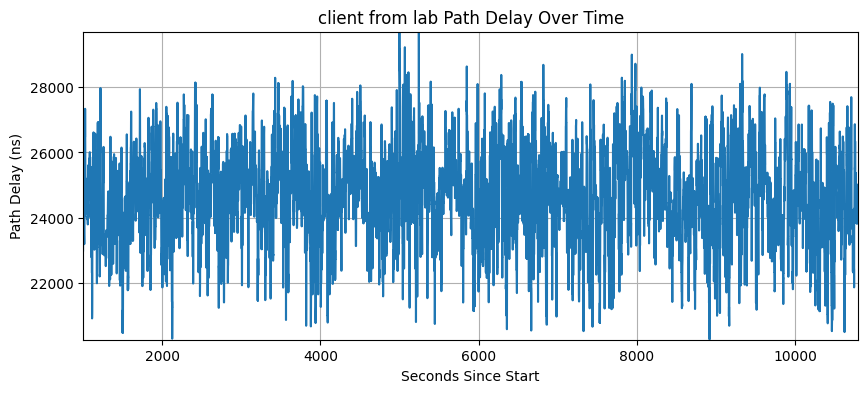

In [327]:
plot_metric(client_0511_2335_ptp, ' Path_Delay', 'Path Delay (ns)', 'client from lab Path Delay Over Time',time_range)

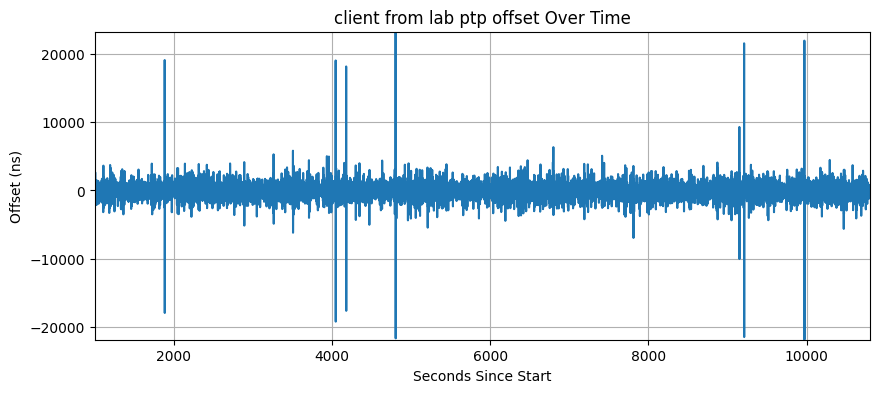

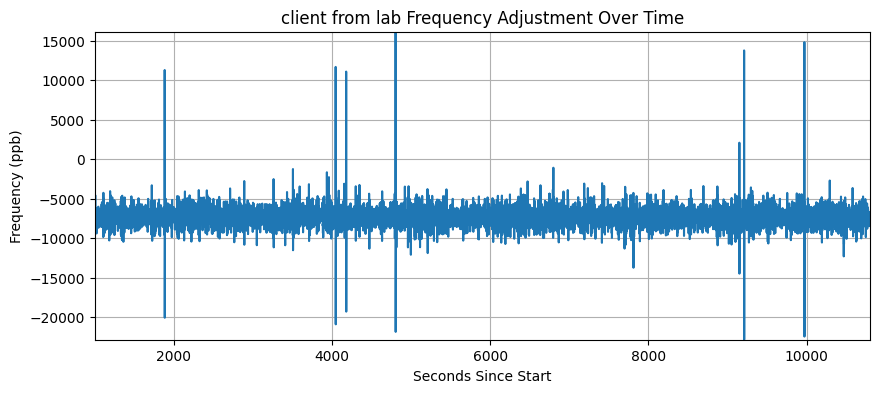

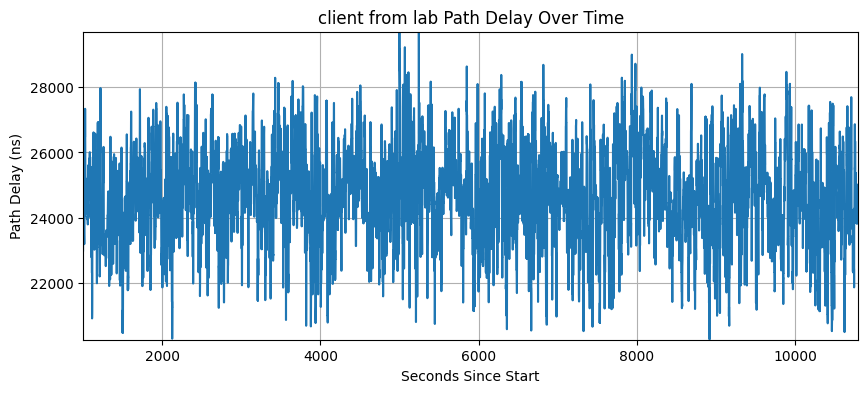

In [285]:
time_range=(1000,10800)
plot_metric(client_0511_2335_ptp, ' Offset', 'Offset (ns)', 'client from lab ptp offset Over Time', time_range)
plot_metric(client_0511_2335_ptp, ' Freq', 'Frequency (ppb)', 'client from lab Frequency Adjustment Over Time',time_range)
plot_metric(client_0511_2335_ptp, ' Path_Delay', 'Path Delay (ns)', 'client from lab Path Delay Over Time',time_range)

In [289]:
client_0512_0945_phc = pd.read_csv('./lab/client/phc2sys_20240512_0945.csv')
client_0512_0945_ptp = pd.read_csv('./lab/client/ptp4l_20240512_0945.csv')
change_time(client_0512_0945_phc)
change_time(client_0512_0945_phc)

In [291]:
client_0512_1855_phc = pd.read_csv('./lab/client/phc2sys_20240512_1855.csv')
client_0512_1855_ptp = pd.read_csv('./lab/client/ptp4l_20240512_1855.csv')
change_time(client_0512_1855_phc)
change_time(client_0512_1855_phc)

In [287]:
client_0513_1555_phc = pd.read_csv('./lab/client/phc2sys_20240513_1555.csv')
client_0513_1555_ptp = pd.read_csv('./lab/client/ptp4l_20240513_1555.csv')
change_time(client_0513_1555_phc)
change_time(client_0513_1555_phc)

In [293]:
significance(client_0512_1855_phc,client_0513_1555_phc)

Wilcoxon Signed-Rank Test: Stat=5360711.50000000, p=0.00000000
Wilcoxon Test: There is a statistically significant difference in the medians of Offset due to optimization.
472457097.624859
419920386.23495674
Mann-Whitney U Test: Statistics=5360711.50000000, p=0.00000000
Mann-Whitney Test: There is a statistically significant difference between the groups.
Median of differences: -1174.0
Mean of differences: -52536711.38990222
The median post-optimization offset is smaller.
On average, the post-optimization offset is smaller.


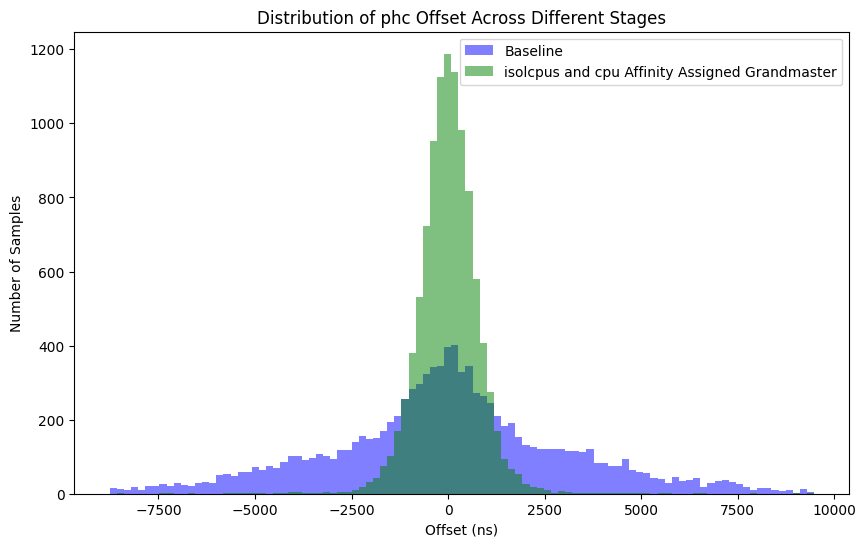

In [328]:
bins = np.linspace(client_0511_2335_phc[' Offset'][1000:].min()/2, client_0512_0945_phc[' Offset'][1000:].max()/2, 100) 

plt.figure(figsize=(10, 6))
plt.hist(client_0511_2335_phc[' Offset'], bins=bins, alpha=0.5, label='Baseline', color='blue')
plt.hist(client_0513_1555_phc[' Offset'], bins=bins, alpha=0.5, label='isolcpus and cpu Affinity Assigned Grandmaster', color='green')
# plt.hist(client_0512_1855_phc[' Offset'], bins=bins, alpha=0.5, label='Applied Affinity ', color='yellow')
# plt.hist(client_cpuAffinity_Steering_Thermal_phc[' Offset'], bins=bins, alpha=0.5, label='Applied Affinity ', color='yellow')
plt.xlabel('Offset (ns)')
plt.ylabel('Number of Samples')
plt.title('Distribution of phc Offset Across Different Stages')
plt.legend(loc='upper right')
plt.savefig('result11.png') 
plt.show()

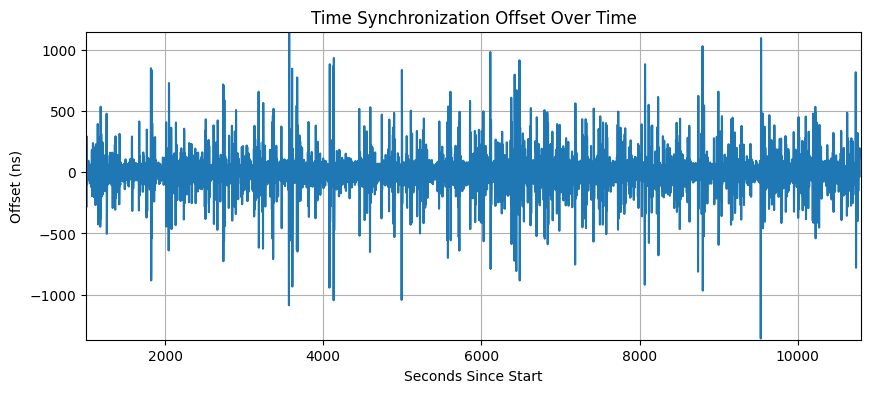

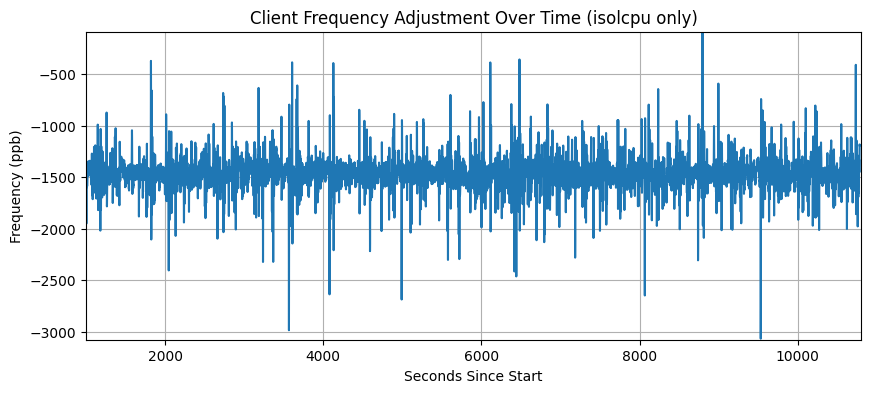

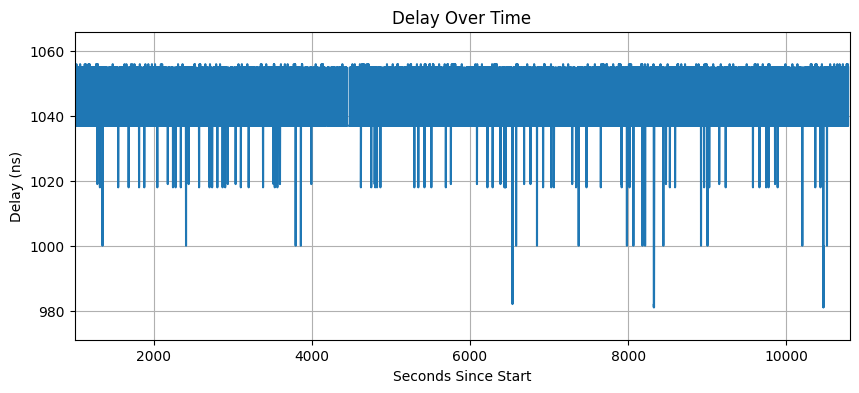

In [235]:
time_range=(1000,10800)
plot_metric(client_cpuAffinity_Steering_Thermal_phc, ' Offset', 'Offset (ns)', 'Time Synchronization Offset Over Time', time_range)
plot_metric(client_cpuAffinity_Steering_Thermal_phc, ' Freq', 'Frequency (ppb)', 'Client Frequency Adjustment Over Time (isolcpu only)',time_range)
plot_metric(client_cpuAffinity_Steering_Thermal_phc, ' Delay', 'Delay (ns)', 'Delay Over Time',time_range)

In [236]:
significance(client_cpuAffinity_Steering_phc ,client_Steering2cores_phc )

Wilcoxon Signed-Rank Test: Stat=25357511.00000000, p=0.00000000
Wilcoxon Test: There is a statistically significant difference in the medians of Offset due to optimization.
46.14226881317858
50.78116810183452
Mann-Whitney U Test: Statistics=25357511.00000000, p=0.00000000
Mann-Whitney Test: There is a statistically significant difference between the groups.
Median of differences: 3.0
Mean of differences: 4.638899288655934
The median post-optimization offset is larger.
On average, the post-optimization offset is larger.


In [178]:
client_0512_0945_phc[' Offset'][1000:].abs().mean()

2274.3426200962817

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 9.275e+03, 1.471e+03, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([-20151.        , -18802.17241379, -17453.34482759, -16104.51724138,
        -14755.68965517, -13406.86206897, -12058.03448276, -10709.20689655,
         -9360.37931034,  -8011.55172414,  -6662.72413793,  -5313.89655172,
         -3965.06896552,  -2616.24137931,  -1267.4137931 ,     81.4137931 ,
          1430.24137931,   2779.06896552,   4127.89655172,   5476.72413793,
          6825.55172414,   8174.37931034,   9523.20689655,  10872.03448276,
         12220.86206897,  13569.68965517,  14918.51724138,  16267.34482759,
         17616.17241379,  18965.        ]),
 <BarContainer object of 29 artists>)

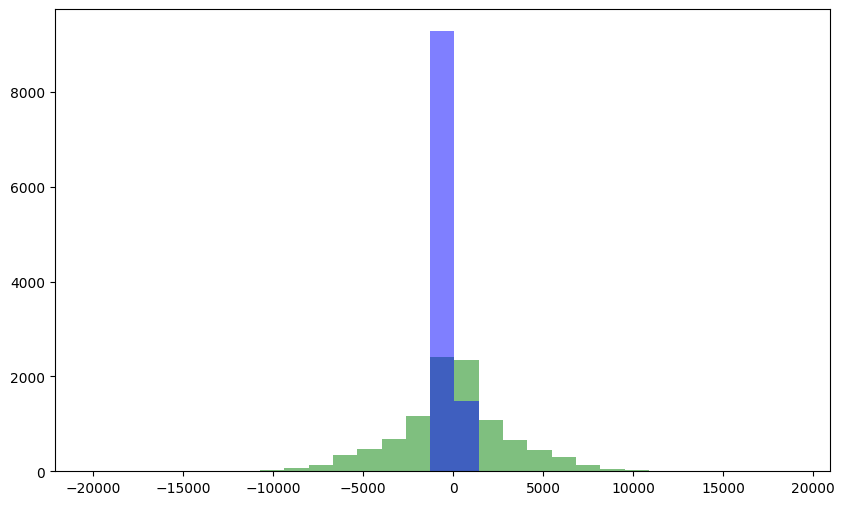

In [187]:
bins = np.linspace(client_0512_0945_phc[' Offset'][1000:].min(), client_0512_0945_phc[' Offset'][1000:].max(), 30) 
plt.figure(figsize=(10, 6))
plt.hist(client_0512_0945_phc[' Offset'], bins=bins, alpha=0.5, label='Baseline', color='green')
plt.hist(client_baseline_phc[' Offset'], bins=bins, alpha=0.5, label='Baseline', color='blue')

(array([   6.,    9.,   13.,    5.,    6.,    6.,   17.,   16.,   23.,
          14.,   26.,   35.,   41.,   44.,   43.,   60.,   87.,  104.,
         136.,  172.,  242.,  379.,  649.,  983., 1304., 1357., 1176.,
         863.,  502.,  366.,  220.,  161.,  110.,   98.,   83.,   64.,
          55.,   40.,   34.,   27.,   25.,   23.,   19.,    7.,    7.,
          13.,   10.,    9.,    5.]),
 array([-744.5       , -715.14285714, -685.78571429, -656.42857143,
        -627.07142857, -597.71428571, -568.35714286, -539.        ,
        -509.64285714, -480.28571429, -450.92857143, -421.57142857,
        -392.21428571, -362.85714286, -333.5       , -304.14285714,
        -274.78571429, -245.42857143, -216.07142857, -186.71428571,
        -157.35714286, -128.        ,  -98.64285714,  -69.28571429,
         -39.92857143,  -10.57142857,   18.78571429,   48.14285714,
          77.5       ,  106.85714286,  136.21428571,  165.57142857,
         194.92857143,  224.28571429,  253.64285714,  283.     

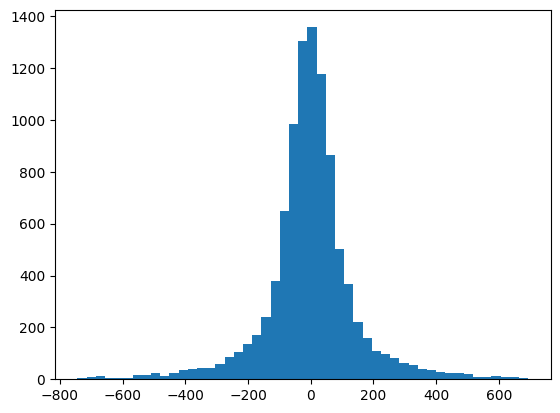

In [198]:
plt.hist(differences, np.linspace(differences.min()/2,differences.max()/2,50))

In [243]:
client_baseline_sys = pd.read_csv('./lab/client/system_metrics_20240511_2335.csv')
gm_baseline_sys = pd.read_csv('./lab/grandmaster/system_metrics_20240511_2335.csv')

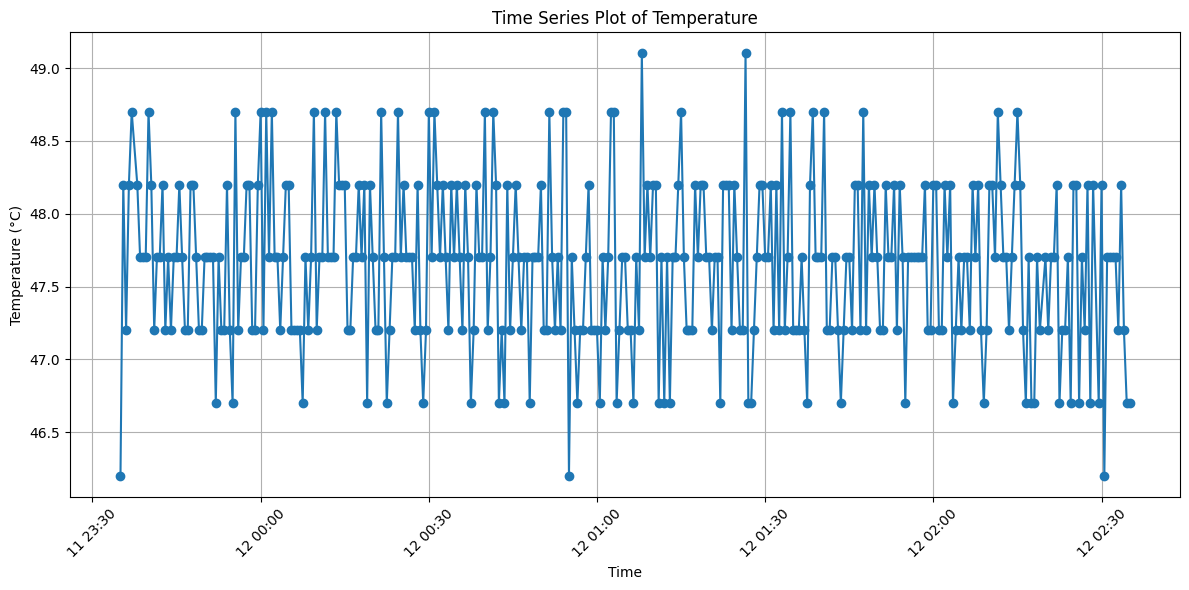

47.64776536312848


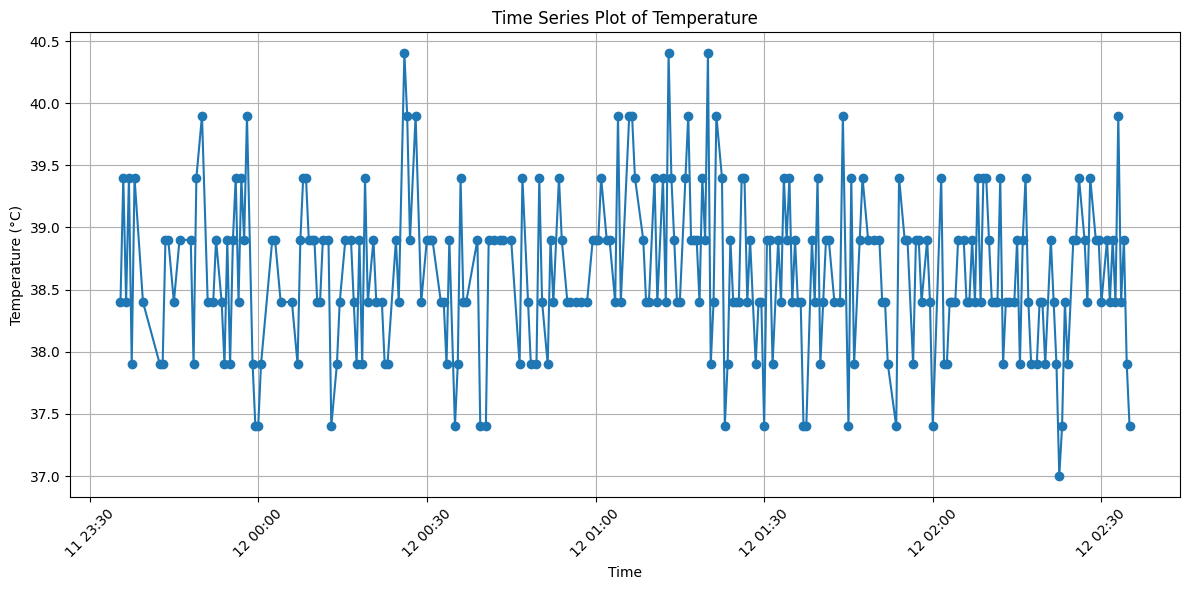

38.639097744360896


In [244]:
draw_sys(client_baseline_sys)
draw_sys(gm_baseline_sys)